In [1]:
import pandas as pd
from sklearn.datasets import make_regression, make_classification
from sklearn.metrics import r2_score, accuracy_score, precision_score
# If AutoML is not installed, uncomment below to lines to allow for correct importy
import os
os.chdir("..")
from AutoML import AutomatedRegression, AutomatedClassification

/Users/opodriscoll/miniconda3/envs/env_AutoML/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
os.getcwd()

'/Users/opodriscoll/Documents/Scripts/AutoML'

In [5]:
X, y = make_regression(n_samples=100000, n_features=10, n_informative=5, random_state=42)


df_X = pd.DataFrame(X)
# df_X['nine'] = pd.cut(df_X[9], bins=[-float('Inf'), -3, -1, 1, 3, float('Inf')], labels=['a', 'b', 'c', 'd', 'e'])
# df_X['ten'] = pd.cut(df_X[9], bins=[-float('Inf'), -1, 1, float('Inf')], labels=['A', 'B', 'C'])
df_y = pd.Series(y)


# prepare Autoregression object
regression = AutomatedRegression(
    y=df_y,
    X=df_X,
    # pca_value=0.95,
    # spline_value= 2,
    # poly_value={'degree': 2, 'interaction_only': True},
    n_trial=2,
    # nominal_columns=['nine'],
    # ordinal_columns=['ten'],
    reload_study=True,
    reload_trial_cap=False,
    write_folder=f'{os.getcwd()}/examples/testdir/tests',
    metric_optimise=r2_score,
    optimisation_direction='maximize',
    models_to_optimize=['lightgbm'],
    models_to_assess=[ 'lightgbm'], # 'lightgbm'
    boosted_early_stopping_rounds = 20,
    n_weak_models=3
    )

In [6]:
import time

start = time.time()
regression.apply()
end = time.time()
print(end - start)
regression.summary

[I 2023-10-30 10:53:26,875] A new study created in RDB with name: regression_lightgbm
[I 2023-10-30 10:53:27,584] Trial 0 finished with value: 0.828173470597419 and parameters: {'scaler': 'minmax', 'objective': 'regression', 'max_depth': 5, 'n_estimators': 88, 'max_bin': 127, 'min_gain_to_split': 14.548647782429915, 'lambda_l1': 0.310444354994832, 'lambda_l2': 8.148018307012941e-07, 'num_leaves': 48, 'feature_fraction': 0.2650640588680904, 'bagging_fraction': 0.37381801866358394, 'bagging_freq': 4, 'min_child_samples': 44, 'random_state': 42, 'verbosity': -1, 'transformers': 'quantile_trans', 'n_quantiles': 600}. Best is trial 0 with value: 0.828173470597419.
[I 2023-10-30 10:54:32,390] Trial 1 finished with value: 0.9967364677715633 and parameters: {'scaler': 'robust', 'objective': 'regression', 'max_depth': 6, 'n_estimators': 332, 'max_bin': 255, 'min_gain_to_split': 14.233283058799998, 'lambda_l1': 4.905556676028766, 'lambda_l2': 0.1886149587855396, 'num_leaves': 79, 'feature_fracti

Number of unique weak models less than requested number of weak models: 1 < 3 
n_weak_models set to total number of weak models instead.
86.64146423339844


{'lightgbm_best': [[4.63802967914166, 0.053872650248549384],
  [0.9971078726180835, 0.0001621359240459472]],
 'lightgbm_0': [[37.18942040240853, 0.5334404179110898],
  [0.8412777754577505, 0.0013446392530735434]],
 'stacked': [[4.2026914662852395, 0.02539005504353872],
  [0.997496964850589, 0.00015489709912921152]]}

Clustering...


Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Calculating Shapely values...


100%|██████████| 200/200 [02:00<00:00,  1.65it/s]


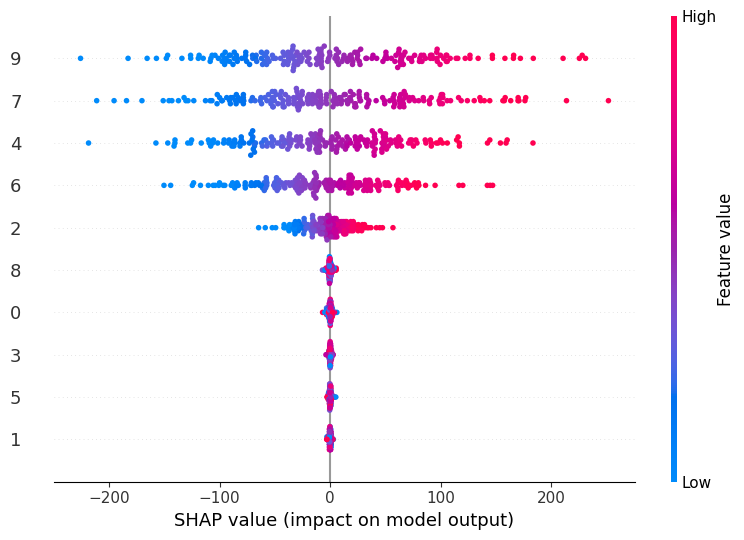

(            0         1          2         3           4         5  \
 0    0.153509  1.009714 -23.448530  1.295447   62.356264  0.579960   
 1   -1.801637 -0.692830  -0.677733 -1.688305  -61.180777  0.068010   
 2    0.180894  0.085216  10.700430  0.018868  -38.266872  0.715932   
 3   -0.990578  0.038601 -10.731996 -0.098150  -71.757520 -0.268788   
 4    0.710670 -0.050851 -37.753910  0.109986  -53.143019 -0.349037   
 ..        ...       ...        ...       ...         ...       ...   
 195  1.072872  0.079906  16.445099 -0.694341  -48.014643 -0.115221   
 196  0.497005 -0.642206 -13.827263  0.613681   27.638073 -1.347124   
 197  1.714139 -0.663186  -1.562445  1.348289   48.068915 -0.488644   
 198 -2.738533 -2.383630 -28.374030  1.560559  116.909945  0.601804   
 199  1.169771  0.183178 -34.966963  0.095914  -96.270036  0.264475   
 
               6           7         8           9  
 0    -22.404199   49.367972  5.452940   24.778474  
 1     43.020148  213.763572 -0.642975  

In [7]:
regression.model_feature_importance()